## 회귀



In [1]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt
from IPython.display import Image



### 다음과 같은 종속 변수 Y와 두 개의 독립 변수 X1,X2를 갖고 있는 데이터가 있습니다. Regressing Tree를 통해 Y를 예측하고자 할 때, 처음으로 분할 되는 변수 및 분할 point를 찾아 주세요.

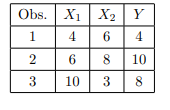

In [3]:
#Image("C:/Users/kdh2/Desktop/세션강의자료/2.png")

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
#보스톤 데이터셋은 범죄율, 강의 인접 유무, 세금 등 13개의 변수를 가지고 있으며, 주택 가격을 라벨 데이터로 가지고 있습니다

### <특징 데이터>
CRIM: 범죄율<br>
INDUS: 비소매상업지역 면적 비율<br>
NOX: 일산화질소 농도<br>
RM: 주택당 방 수<br>
LSTAT: 인구 중 하위 계층 비율<br>
B: 인구 중 흑인 비율<br>
PTRATIO: 학생/교사 비율<br>
ZN: 25,000 평방피트를 초과 거주지역 비율<br>
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0<br>
AGE: 1940년 이전에 건축된 주택의 비율<br>
RAD: 방사형 고속도로까지의 거리<br>
DIS: 직업센터의 거리<br>
TAX: 재산세율<br>

In [ ]:
data = boston.data
label = boston.target
columns = boston.feature_names
label

In [ ]:
data = pd.DataFrame(data, columns = columns)
label=pd.DataFrame(label,columns=['label'])

data.head()
label

In [ ]:
from sklearn.model_selection import train_test_split

#변수를 split 해주세요


### DecisionTreeRegressor와 DecisionTreeClassifier를 쓰는 상황을 구분하여 작성 해주세요

In [ ]:
X_train['RM']

### Decision Tree Regressor


#### 1) x 변수로 'RM' 변수를, y 변수는 주택 가격으로 하여 회귀트리모델을 돌려주세요.<br>

In [ ]:
#1) 트리의 max_depth는 5로 지정해주세요
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(max_depth=5)
#fit()을 이용하여 모델 학습

#예측값=
pred=

#### 2) R<sup>2</sup> 으로 회귀 모델이 데이터를 잘 표현하는지 확인해주세요.
(R<sup>2</sup>값이 1에 가까울수록 회귀 모델이 데이터를 잘 표현한다는 것을 의미합니다.)

In [ ]:
from sklearn.metrics import r2_score


In [ ]:
line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 10)
line_y = tree_reg.predict(line_x.reshape((-1, 1)))

plt.scatter(X_test['RM'].values.reshape((-1, 1)), y_test, c = 'black')
plt.plot(line_x, line_y, c = 'red')
plt.legend(['Regression line', 'Test data sample'], loc='upper left')

#### 변수 하나로는 R<sup>2</sup>값이 높지 않은 것을 확인하였습니다.
#### 3) 13개의 변수를 모두 사용해 결정 트리 회귀 모델을 사용해 보세요. 

In [ ]:
#파라미터 조정 자유입니다. 
tree_reg2=DecisionTreeRegressor()



# 분류

In [ ]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

adult_path = join('C:\\Users\\kdh2\\보아즈 과제', 'adult_data.csv')
column_path = join('C:\\Users\\kdh2\\보아즈 과제', 'adult_names.txt')
adult_columns = list()
for l in open(column_path):
    adult_columns = l.split()

In [ ]:
data = pd.read_csv(adult_path, names = adult_columns)
data['income'].value_counts()

In [ ]:
label = data['income']
del data['income']
data.head()


In [ ]:
label

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
# Pandas get_dummies 함수를 사용해 범주형 변수를 One-Hot Encoding하고, 라벨 데이터를 0,1 로 변경
data = pd.get_dummies(data)
label = label.map(lambda x : 0 if x =='>50K' else 1)
data
label.sum()


## Cross Validation

In [ ]:
from sklearn.model_selection import train_test_split

# (Train, Valid), Test 분할
X_train, X_test, y_train,y_test=train_test_split(data,label,test_size=0.2,random_state=785)

In [ ]:
# Train, Valid 분할
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2,random_state=785)

In [ ]:
#랜덤 포레스트로 모델을 학습시켜 주세요.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Valid 데이터로 검증


print("랜덤 포레스트 검증 데이터 정확도 : {:.2f}%".format(accuracy_score(y_valid,y_pred)*100))

# Test 데이터로 모델 평가
print("랜덤 포레스트 테스트 데이터 정확도 : {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

## Parameter Tuning
간단히 GridSearchCV 함수를 사용해 랜덤 포레스트의 n_estimator, max_depth 파라미터 중 가장 좋은 파라미터 조합을 찾아보겠습니다.<br>
GridSearchCV 함수는 Sklearn의 model_selection 패키지에 있습니다.<br>

In [ ]:
from sklearn.model_selection import GridSearchCV


params = {
    'n_estimators':[100], 
    #n_estimators를 여러개로 주면 너무 느려서 한개로 했습니다. 여러개로 돌려보시고 더 높은 성능이 나오면 그것으로 해도 무방합니다
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}

#위의 리스트 값말고 다른값들로 돌려보았을 때 괜찮은 값 있으면 변경하셔도 됩니다.

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행

grid_cv=GridSearchCV()
grid_cv.fit()

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
from sklearn.model_selection import cross_val_score

# 위에서 나온 최적 하이퍼 파라미터로 모델을 학습시켜 주세요.




print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

In [ ]:
# 개별 feature들의 중요도를 시각화해주세요.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### 50개의 변수에 대한 200개의 관측치를 갖는 데이터 셋을 갖고 있다고 가정합시다. 랜덤 포레스트를 돌려 importance plot을 그리고 나서, 그 결과를 바탕으로 상위 10개의 변수를 이용하여 선형 회귀를 fit했다고 가정해봅시다. 이때 회귀 모델이 랜덤 포레스트에 비해 성능이 훨씬 안 좋았습니다. 이러한 결과가 도출된 이유(가능성)에 대해서 두 가지 이상 제시해주세요.
- 
- 


## Voting Ensemble

#### 1) 모델 불러오기 및 정의하기

In [ ]:
from sklearn.ensemble import VotingClassifier

#원하는 모델 3개를 골라 VotingClassifier을 돌려주세요.
#저는 성능 상관없이 모델을 가져왔는데 부담없이 원하시는 모델을 돌려주시면 됩니다ㅎㅎ


In [ ]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
models=[('lgbm',LGBMClassifier()),
       ('xgbm',XGBClassifier()),
       ('svc',SVC(probability=True))]

soft_vote=VotingClassifier(models, voting='soft')
vote_cv=cross_validate(soft_vote,X_train,y_train,cv=5)

In [ ]:
soft_vote.fit(X_train,y_train)
vote_pred=soft_vote.predict(X_test)
print(accuracy_score(pred,y_test))

# 수고하셨습니다:)